In [1]:
from pathlib import Path
from glob import glob
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import make_interp_spline, BSpline

# interactive plots
%matplotlib widget

import matrix_r  # module to calculate of matriz distance
import functions  # module with all the individuals function to do analysis
import distance_matrix
import atoms_index_list
import histogram

In [2]:
working_dir: Path = Path("/home/edison/repositories/radial_distribution")

if not working_dir.exists():
    raise FileNotFoundError(f"{working_dir} does not exist")

In [3]:
dir_other: Path = working_dir / "files_xyz"

files_hf: list = glob(str(dir_other / "hf" / "*.xyz"))
files_pbe0: list = glob(str(dir_other / "pbe0" / "*.xyz"))
files_camb3lyp: list = glob(str(dir_other / "camb3lyp" / "*.xyz"))
files_wb97xd: list = glob(str(dir_other / "wb97xd_grimmeD2" / "*.xyz"))
files_b2plypd3: list = glob(str(dir_other / "b2plypd3" / "*.xyz"))
files_pbeqidh: list = glob(str(dir_other / "pbeqidh" / "*.xyz"))
files_mp2: list = glob(str(dir_other / "mp2" / "*.xyz"))
files_zora_sr: list = glob(str(dir_other / "zora" / "sr" / "*.xyz"))
files_zora_so: list = glob(str(dir_other / "zora" / "so" / "*.xyz"))


coordinates_hf: dict = functions.dict_coordinates_xyz(files_hf)
coordinates_pbe0: dict = functions.dict_coordinates_xyz(files_pbe0)
coordinates_camb3lyp: dict = functions.dict_coordinates_xyz(files_camb3lyp)
coordinates_wb97xd: dict = functions.dict_coordinates_xyz(files_wb97xd)
coordinates_b2plypd3: dict = functions.dict_coordinates_xyz(files_b2plypd3)
coordinates_pbeqidh: dict = functions.dict_coordinates_xyz(files_pbeqidh)
coordinates_mp2: dict = functions.dict_coordinates_xyz(files_mp2)
coordinates_zora_sr: dict = functions.dict_coordinates_xyz(files_zora_sr)
coordinates_zora_so: dict = functions.dict_coordinates_xyz(files_zora_so)

coordinates_mp2

{'/home/edison/repositories/radial_distribution/files_xyz/mp2/w5s7.xyz':    element  x-coordinate  y-coordinate  z-coordinate
 0       Hg      0.904213     -0.008751      0.301419
 1        O     -0.580352      1.054766     -1.229892
 2        H     -1.534924      1.027242     -1.082449
 3        H     -0.419177      1.879801     -1.707020
 4        O      0.762510     -1.470814     -1.270373
 5        H      1.459095     -2.105019     -1.496393
 6        H      0.380152     -1.147330     -2.100149
 7        O      4.332718      1.306042      1.655912
 8        H      4.871531      0.853040      2.316039
 9        H      4.762822      2.152960      1.483447
 10       O      1.896629      1.209512      1.604082
 11       H      2.964187      1.244220      1.679196
 12       H      1.489583      1.394240      2.460919
 13       O     -1.075542     -1.038734      1.037088
 14       H     -1.562679     -0.883323      1.856771
 15       H     -1.305387     -1.937993      0.769120,
 '/home/e

In [4]:
distances_dict_hf: dict = distance_matrix.distance_matrix(coordinates_hf, (0, 0, 0))
distances_dict_pbe0: dict = distance_matrix.distance_matrix(coordinates_pbe0, (0, 0, 0))
distances_dict_camb3lyp: dict = distance_matrix.distance_matrix(coordinates_camb3lyp, (0, 0, 0))
distances_dict_wb97xd: dict = distance_matrix.distance_matrix(coordinates_wb97xd, (0, 0, 0))
distances_dict_b2plypd3: dict = distance_matrix.distance_matrix(coordinates_b2plypd3, (0, 0, 0))
distances_dict_pbeqidh: dict = distance_matrix.distance_matrix(coordinates_pbeqidh, (0, 0, 0))
distances_dict_mp2: dict = distance_matrix.distance_matrix(coordinates_mp2, (0, 0, 0))
distances_dict_zora_sr: dict = distance_matrix.distance_matrix(coordinates_zora_sr, (0, 0, 0))
distances_dict_zora_so: dict = distance_matrix.distance_matrix(coordinates_zora_so, (0, 0, 0))

distances_dict_mp2

{'/home/edison/repositories/radial_distribution/files_xyz/mp2/w5s7.xyz':    atoms         0         1         2         3         4         5  \
 0     Hg  0.000000  2.383257  2.989609  3.058074  2.151334  2.816800   
 1      O  2.383257  0.000000  0.966285  0.966598  2.860677  3.770227   
 2      H  2.989609  0.966285  0.000000  1.536827  3.399089  4.352765   
 3      H  3.058074  0.966598  1.536827  0.000000  3.579619  4.410336   
 4      O  2.151334  2.860677  3.399089  3.579619  0.000000  0.968779   
 5      H  2.816800  3.770227  4.352765  4.410336  0.968779  0.000000   
 6      H  2.708972  2.555218  3.071155  3.155471  0.969210  1.563908   
 7      O  3.913819  5.703443  6.481171  5.849703  5.387064  5.461692   
 8      H  4.532217  6.506715  7.254153  6.725388  5.928466  5.910116   
 9      H  4.578106  6.092433  6.892944  6.091536  6.059518  6.158283   
 10     O  2.041075  3.767066  4.361907  4.095809  4.090583  4.559660   
 11     H  2.776995  4.589384  5.283538  4.828828  4

In [5]:
grid = (1.5, 3, 0.1)

# - number of bins for the accurences
rmin, rmax, dr = grid
nbins = int((rmax - rmin) / dr)

In [6]:
atoms_list: list = ['Hg', 'O']

atoms_index_dict_hf: dict = atoms_index_list.atoms_index_dict(distances_dict_hf, atoms_list, grid)
atoms_index_dict_pbe0: dict = atoms_index_list.atoms_index_dict(distances_dict_pbe0, atoms_list, grid)
atoms_index_dict_camb3lyp: dict = atoms_index_list.atoms_index_dict(distances_dict_camb3lyp, atoms_list, grid)
atoms_index_dict_wb97xd: dict = atoms_index_list.atoms_index_dict(distances_dict_wb97xd, atoms_list, grid)
atoms_index_dict_b2plypd3: dict = atoms_index_list.atoms_index_dict(distances_dict_b2plypd3, atoms_list, grid)
atoms_index_dict_pbeqidh: dict = atoms_index_list.atoms_index_dict(distances_dict_pbeqidh, atoms_list, grid)
atoms_index_dict_mp2: dict = atoms_index_list.atoms_index_dict(distances_dict_mp2, atoms_list, grid)
atoms_index_dict_zora_sr: dict = atoms_index_list.atoms_index_dict(distances_dict_zora_sr, atoms_list, grid)
atoms_index_dict_zora_so: dict = atoms_index_list.atoms_index_dict(distances_dict_zora_so, atoms_list, grid)

# atoms_index_dict_wb97xd

In [7]:
# - radial (bond) distribution analysis (RDA); i.e., atoms_list_AB = [A, B]
histogram_hf: np.array = histogram.rda(atoms_index_dict_hf, distances_dict_hf, grid, nbins)
histogram_pbe0: np.array = histogram.rda(atoms_index_dict_pbe0, distances_dict_pbe0, grid, nbins)
histogram_camb3lyp: np.array = histogram.rda(atoms_index_dict_camb3lyp, distances_dict_camb3lyp, grid, nbins)
histogram_wb97xd: np.array = histogram.rda(atoms_index_dict_wb97xd, distances_dict_wb97xd, grid, nbins)
histogram_b2plypd3: np.array = histogram.rda(atoms_index_dict_b2plypd3, distances_dict_b2plypd3, grid, nbins)
histogram_pbeqidh: np.array = histogram.rda(atoms_index_dict_pbeqidh, distances_dict_pbeqidh, grid, nbins)
histogram_mp2: np.array = histogram.rda(atoms_index_dict_mp2, distances_dict_mp2, grid, nbins)
histogram_zora_sr: np.array = histogram.rda(atoms_index_dict_zora_sr, distances_dict_zora_sr, grid, nbins)
histogram_zora_so: np.array = histogram.rda(atoms_index_dict_zora_so, distances_dict_zora_so, grid, nbins)


In [8]:
histogram_hf_nan = histogram_hf.astype('float')
histogram_pbe0_nan = histogram_pbe0.astype('float')
histogram_camb3lyp_nan = histogram_camb3lyp.astype('float')
histogram_wb97xd_nan = histogram_wb97xd.astype('float')
histogram_b2plypd3_nan = histogram_b2plypd3.astype('float')
histogram_pbeqidh_nan = histogram_pbeqidh.astype('float')
histogram_mp2_nan = histogram_mp2.astype('float')
histogram_zora_sr_nan = histogram_zora_sr.astype('float')
histogram_zora_so_nan = histogram_zora_so.astype('float')


histogram_hf_nan[histogram_hf_nan == 0] = float('nan')
histogram_pbe0_nan[histogram_pbe0_nan == 0] = float('nan')
histogram_camb3lyp_nan[histogram_camb3lyp_nan == 0] = float('nan')
histogram_wb97xd_nan[histogram_wb97xd_nan == 0] = float('nan')
histogram_b2plypd3_nan[histogram_b2plypd3_nan == 0] = float('nan')
histogram_pbeqidh_nan[histogram_pbeqidh_nan == 0] = float('nan')
histogram_mp2_nan[histogram_mp2_nan == 0] = float('nan')
histogram_zora_sr_nan[histogram_zora_sr_nan == 0] = float('nan')
histogram_zora_so_nan[histogram_zora_so_nan == 0] = float('nan')


In [9]:
distribution = np.linspace(rmin, rmax, nbins, endpoint = False)
distribution_smooth = np.linspace(rmin, rmax, len(distribution) * 100, endpoint = False)

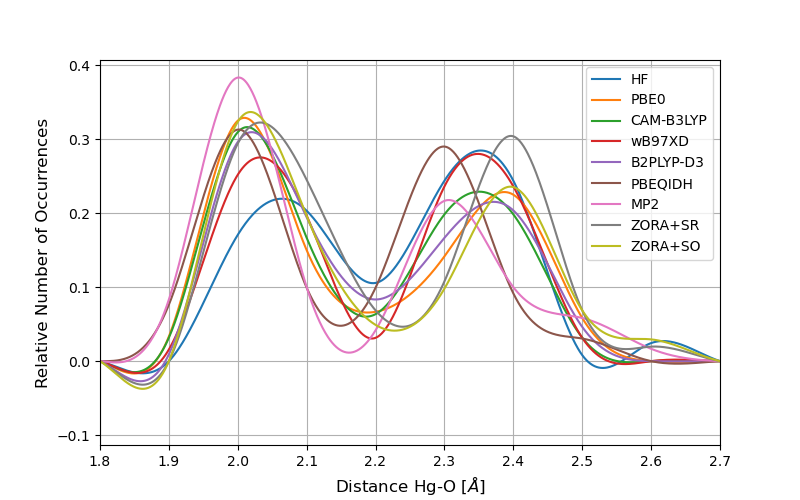

In [10]:


fig = plt.figure(figsize=(8, 5))

# ax = brokenaxes(ylims=((0, 0.25),(0.95, 1.05)), hspace=.2)
ax = fig.add_subplot(111)
ax.grid(b=True, which='major')

# - lines style in a for loop
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-d'] #, '-h', '-p', '-D', '-H']
lines = ['s', '^', 'v', '<', '>', '.', 's', 'd', 'o'] #, '-h', '-p', '-D', '-H']
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-+', '-x', '-d', '-1', '-2', '-3', '-4', '-h', '-p', '-|', '-_', '-D', '-H']
# lines = ["-","--","-.",":"]
linecycler = cycle(lines)

cm = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)

total_hf = sum(histogram_hf)
total_pbe0 = sum(histogram_pbe0)
total_camb3lyp = sum(histogram_camb3lyp)
total_wb97xd = sum(histogram_wb97xd)
total_b2plypd3 = sum(histogram_b2plypd3)
total_pbeqidh = sum(histogram_pbeqidh)
total_mp2 = sum(histogram_mp2)
total_zora_sr = sum(histogram_zora_sr)
total_zora_so = sum(histogram_zora_so)

# plt.fill_between(
#     smooth_x, 
#     smooth_y / total_all, 
#     where=(smooth_y / total_all>0),
#     alpha=0.3,
#     color="gray",
#     label="distribution",
    # )
# ax.plot(
#     # distribution_all, 
#     # histogram_all / total_all,    
#     smooth_x,
#     smooth_y / total_all,
#     "-",
#     # next(linecycler),
#     color="black",
#     label="distribution",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )


smooth = make_interp_spline(distribution, histogram_hf / total_hf, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="HF",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    )
smooth = make_interp_spline(distribution, histogram_pbe0 / total_pbe0, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="PBE0",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    )
smooth = make_interp_spline(distribution, histogram_camb3lyp / total_camb3lyp, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="CAM-B3LYP",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    )

smooth = make_interp_spline(distribution, histogram_wb97xd / total_wb97xd, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="wB97XD",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    )
smooth = make_interp_spline(distribution, histogram_b2plypd3 / total_b2plypd3, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="B2PLYP-D3",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    )
smooth = make_interp_spline(distribution, histogram_pbeqidh / total_pbeqidh, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="PBEQIDH",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    )        
smooth = make_interp_spline(distribution, histogram_mp2 / total_mp2, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="MP2",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    ) 
smooth = make_interp_spline(distribution, histogram_zora_sr / total_zora_so, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="ZORA+SR",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    ) 
smooth = make_interp_spline(distribution, histogram_zora_so / total_zora_so, k=3)
ax.plot(
    distribution_smooth, 
    smooth(distribution_smooth),    
    # "-",
    # next(linecycler),
    color=next(cm),
    label="ZORA+SO",
    # markersize=7,
    # alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    )         
# ax.plot(
#     distribution, 
#     histogram_hf / total_hf,    
#     # "-",
#     # next(linecycler),
#     color=next(cm),
#     label="HF",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution, 
#     histogram_pbe0 / total_pbe0,    
#     "-",
#     # next(linecycler),
#     color=next(cm),
#     label="PBE0",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution, 
#     histogram_camb3lyp / total_camb3lyp,    
#     "-",
#     # next(linecycler),
#     color=next(cm),
#     label="CAM-B3LYP",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution, 
#     histogram_wb97xd / total_wb97xd,    
#     "-",
#     # next(linecycler),
#     color=next(cm),
#     label="wB97xD",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution, 
#     histogram_b2plypd3 / total_b2plypd3,    
#     "-",
#     # next(linecycler),
#     color=next(cm),
#     label="B2PLYP-D3",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution, 
#     histogram_pbeqidh / total_pbeqidh,
#     "-",
#     # next(linecycler),
#     color=next(cm),
#     label="PBEQIDH",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution, 
#     histogram_mp2 / total_mp2,   
#     "-",
#     # next(linecycler),
#     color=next(cm),
#     label="MP2",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution, 
#     histogram_zora_sr / total_zora_sr,    
#     "-",
#     # next(linecycler),
#     color=next(cm),
#     label="ZORA+SR",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )                    
# ax.plot(
#     distribution, 
#     histogram_zora_so / total_zora_so,    
#     "-",
#     # next(linecycler),
#     # color=next(cm),
#     color="black",
#     label="ZORA+SO",
#     # markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )  



plt.xlim(1.8, 2.7)
# plt.ylim(0.001, 1.1)

ax.xaxis.set_major_locator(MultipleLocator(0.1))

ax.set_ylabel('Relative Number of Occurrences', fontsize=12)
ax.set_xlabel(f'Distance {"-".join(atoms_list)}'r" [$\AA$]", fontsize=12)
plt.legend(loc="best", fontsize=10, ncol=1)

fig.savefig(
    working_dir / 'rda_HgO_gaussian.png',
    dpi=500,
    bbox_inches='tight',
    )  